In [1]:
'''
Adult Census Income Data
Goal : Predict if income is above or below $50k based on personal text data features 
15 Columns (8 categorical data) 48841 rows
majority vs miniority class = 76% vs 24%
missing data : about 7%
Evaluation Metric: Accuracy
* I chose to use accuracy over ROC-AUC because for an imbalanced datatset
with a severe skew and smaller amount of minority class, the ROC AUC
can be misleading.
* Because less than 80% of examples belong to the majority class, 
I determined that accuracy would be the best evaluation metric for me.
'''

'\nAdult Census Income Data\nGoal : Predict if income is above or below $50k based on personal text data features \n15 Columns (8 categorical data) 48841 rows\nmajority vs miniority class = 76% vs 24%\nmissing data : about 7%\nEvaluation Metric: Accuracy\n* I chose to use accuracy over ROC-AUC because for an imbalanced datatset\nwith a severe skew and smaller amount of minority class, the ROC AUC\ncan be misleading.\n* Because less than 80% of examples belong to the majority class, \nI determined that accuracy would be the best evaluation metric for me.\n'

In [ ]:
'''
Unfortunately, the XGBoost package was not properly working on my laptop
so I was unable to include the model in my program.
This could've significantly affected the results, however, I was
pleased that the rest of the algorithms worked correctly.
'''

In [2]:
'''
Results 
Best Model parameters:
StackingClassifier(final estimator=Logistic Regression,final_estimator__C= 0.1,stack_method='auto'}) and the following 5 estimators: 
1. Knn(n_neighbors=6)
2. SVM(C=10,gamma=0.1,kernel='rbf')
3. Random Forest(criterion='gini', max_depth=6, max_features='auto',n_estimators=100)
4. Gradient Boost(learning_rate= 0.5, max_depth= 6, n_estimators=150)
5. ExtraTrees(criterion='entropy', max_depth= 8, max_features='auto', n_estimators=50)
Mean Cross validation score of Best model: 0.85
Test score of best model: 0.8416804864566059 
'''

"\nResults \nBest Model parameters:\nStackingClassifier(final estimator=Logistic Regression,final_estimator__C= 0.1,stack_method='auto'}) and the following 5 estimators: \n1. DecisionTree(max_depth=5)\n2. Random Forest(criterion='gini', max_depth=6, max_features='auto',n_estimators=100)\n3. Gradient Boost(learning_rate= 0.5, max_depth= 6, n_estimators=150)\n4. ExtraTrees(criterion='entropy', max_depth= 8, max_features='auto', n_estimators=50)\n5. XGBoost(learning_rate=0.5, max_depth=6, min_child_weight=1, n_estimators=150, subsample=0.8) \nMean Cross validation score of Best model: 0.8883\nTrain score of bestmodel:\n0.9963 \nTest score of best model: 0.9020 \n"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
columns = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']
df = pd.read_csv('adult-training.csv', names= columns)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                 32561 non-null int64
Work Class          32561 non-null object
Final Weight        32561 non-null int64
Education           32561 non-null object
Education Number    32561 non-null int64
Marital Status      32561 non-null object
Occupation          32561 non-null object
Relationship        32561 non-null object
Race                32561 non-null object
Sex                 32561 non-null object
Capital Gain        32561 non-null int64
Capital Loss        32561 non-null int64
Hours per Week      32561 non-null int64
Country             32561 non-null object
Income              32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df['Income'] = labelEncoder.fit_transform(df['Income'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                 32561 non-null int64
Work Class          32561 non-null object
Final Weight        32561 non-null int64
Education           32561 non-null object
Education Number    32561 non-null int64
Marital Status      32561 non-null object
Occupation          32561 non-null object
Relationship        32561 non-null object
Race                32561 non-null object
Sex                 32561 non-null object
Capital Gain        32561 non-null int64
Capital Loss        32561 non-null int64
Hours per Week      32561 non-null int64
Country             32561 non-null object
Income              32561 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


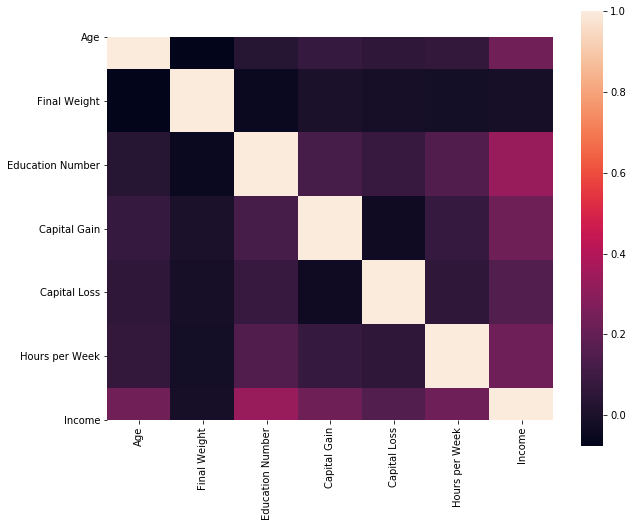

In [8]:
f,ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), square=True, ax=ax )

In [9]:
df['Age'] = pd.cut(df['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

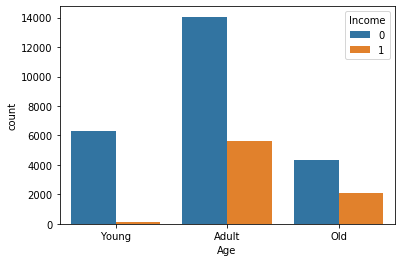

In [10]:
sns.countplot(x = 'Age', hue = 'Income', data = df)

In [11]:
df['Capital Diff'] = df['Capital Gain'] - df['Capital Loss']
df.drop(['Capital Gain'], axis = 1, inplace = True)
df.drop(['Capital Loss'], axis = 1, inplace = True)

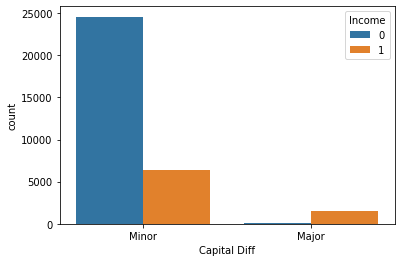

In [12]:
df['Capital Diff'] = pd.cut(df['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Capital Diff', hue = 'Income', data = df)

In [13]:
df.drop(['Final Weight'], axis = 1, inplace = True)

In [14]:
df['Hours per Week'] = pd.cut(df['Hours per Week'],bins = [0, 30, 40, 100],labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

In [15]:
df = df.drop(df[df['Work Class'] == ' ?'].index)
df = df.drop(df[df['Work Class'] == ' Without-pay'].index)
df = df.drop(df[df['Work Class'] == ' Never-worked'].index)

In [16]:
df['Relationship'].value_counts()

 Husband           12700
 Not-in-family      7865
 Own-child          4520
 Unmarried          3269
 Wife               1432
 Other-relative      918
Name: Relationship, dtype: int64

In [17]:
df['Marital Status'].value_counts()

 Married-civ-spouse       14331
 Never-married             9908
 Divorced                  4258
 Separated                  959
 Widowed                    839
 Married-spouse-absent      388
 Married-AF-spouse           21
Name: Marital Status, dtype: int64

In [18]:
df.drop(['Education Number'], axis = 1, inplace = True)
df['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],' School', inplace = True)
df['Education'].value_counts()

 HS-grad         9959
 Some-college    6772
 Bachelors       5182
 School          3820
 Masters         1675
 Assoc-voc       1321
 Assoc-acdm      1019
 Prof-school      558
 Doctorate        398
Name: Education, dtype: int64

In [19]:
df['Race'].unique()
df['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

In [20]:
df['Country'].value_counts()

 United-States                 27491
 Mexico                          610
 ?                               556
 Philippines                     187
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Haiti                            42
 Taiwan                           42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

In [21]:
df = df.drop(df[df['Country'] == ' ?'].index)

In [22]:
countries = np.array(df['Country'].unique())
countries = np.delete(countries, 0)

In [23]:
df['Country'].replace(countries, 'Other', inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30148 entries, 0 to 32560
Data columns (total 12 columns):
Age               30148 non-null category
Work Class        30148 non-null object
Education         30148 non-null object
Marital Status    30148 non-null object
Occupation        30148 non-null object
Relationship      30148 non-null object
Race              30148 non-null object
Sex               30148 non-null object
Hours per Week    30148 non-null category
Country           30148 non-null object
Income            30148 non-null int64
Capital Diff      30148 non-null category
dtypes: category(3), int64(1), object(8)
memory usage: 2.4+ MB


In [25]:
y = df['Income']
X = df.drop(['Income'], axis = 1)
X = pd.get_dummies(X)
X.shape

(30148, 56)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [27]:
# Naive Bayes 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [28]:
model_dummy = DummyClassifier(strategy='most_frequent',random_state=123)
model_dummy.fit(X_train,y_train)
cv_scores = cross_val_score(model_dummy, X_train, y_train,scoring='accuracy')
y_pred = model_dummy.predict(X_test)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

#Accuracy Score
print("Naive Bayes Algorithm Accuracy Performance: ", accuracy_score(y_test, y_pred))


Mean Cross-validation scores: 0.7506515717508148

Naive Bayes Algorithm Accuracy Performance:  0.7516860143725815


In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression().fit(X_train, y_train)
cv_scores = cross_val_score(clf, X_train, y_train,scoring='accuracy')
y_pred = clf.predict(X_test)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
print("Logistic.coef_:", clf.coef_)
print("Logistic.intercept_:", clf.intercept_)

#Accuracy Score
print("Logistic Regression Accuracy Performance: ", accuracy_score(y_test, y_pred))

/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

Mean Cross-validation scores: 0.8467047407961322

Logistic.coef_: [[-1.07691916e+00  3.14083517e-01  5.92505090e-01  5.73952369e-01
  -1.96724450e-01 -8.50828893e-02  3.12674879e-01 -4.04599096e-01
  -3.70551367e-01 -2.87551147e-01 -4.66210338e-01  2.68153464e-01
   1.51479117e+00 -8.57257497e-01  7.11335954e-01  1.11985732e+00
  -1.66212350e+00 -5.11325982e-01 -4.80779879e-01  1.36154669e+00
   1.13658500e+00 -6.48083227e-01 -1.03069478e+00 -3.32415091e-01
  -1.76489277e-01  1.38756670e-01 -1.19173170e-02  8.44346675e-02
   8.61707426e-01 -8.02922449e-01 -6.30041815e-01 -2.51993355e-01
  -7.61260720e-01 -1.16206928e+00  6.03300757e-01  6.74045506e-01
   3.49412806e-01  7.34332438e-01  3.88410732e-03 -3.26782722e-03
   2.24627843e-02 -4.00850488e-01 -9.48970657e-01 -1.98035884e-01
   1.35833152e+00 -1.71352426e-01  1.02187126e-03 -4.67202272e-01
   2.96871718e-01 -8.01180052e-01  7.32552012e-02  5.57594296e-01
   1.33384649e-02 -1.83669019e-01 -1.74872728e+00  1.57839673e+00]]
Logistic

/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#Parameters
param_dtree = {'max_depth': range(1,7)}

#Grid Search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True, scoring = 'accuracy')
grid_dtree.fit(X_train, y_train)
y_pred = grid_dtree.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#Find the Best Parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Train and Test Data Performance
print("Decision Tree Train Performance: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Test Performance: ", grid_dtree.score(X_test,y_test))

#Accuracy Score
print("Decision Tree Accuracy Performance: ", accuracy_score(y_test, y_pred))

Best Mean Cross-validation score: 0.84

Decision Tree parameters:  {'max_depth': 6}
Decision Tree Train Performance:  0.8414443444060086
Decision Tree Test Performance:  0.82808181315644
Decision Tree Accuracy Performance:  0.82808181315644


In [31]:
#Knn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#Parameters

param_knn = {'n_neighbors': range(5,10)}

#Grid Search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True, scoring='accuracy')
grid_knn.fit(X_train, y_train)
y_pred = grid_knn.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#Find the Best Parameters
print('KNN parameters: ', grid_knn.best_params_)

#Train and Test Data Performanec
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

#Accuracy Score
print("Knn Accuracy Performance: ", accuracy_score(y_test, y_pred))

Best Mean Cross-validation score: 0.83

KNN parameters:  {'n_neighbors': 9}
KNN Test Performance:  0.8286346047540077
Knn Accuracy Performance:  0.8286346047540077


In [32]:
#SVM
from sklearn import svm

model_svm = svm.SVC(random_state=0)

C = [0.1, 1, 10]

param_svm = [{'kernel': ['rbf'],
               'C': C,
               'gamma': [0.01, 0.1, 1]},
              {'kernel': ['linear'],
               'C': C}]

grid_svm = GridSearchCV(model_svm, param_svm, cv=5,
                          return_train_score=True,scoring = 'accuracy')
grid_svm.fit(X_train, y_train)
y_pred = grid_svm.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svm.best_score_))
print()

#Find the Best Parameters
print('SVM parameters: ', grid_svm.best_params_)

#Train and Test Data Performance
print("SVM Test Performance: ", grid_svm.score(X_test,y_test))

#Accuracy Score
print("SVM Accuracy Performance: ", accuracy_score(y_test, y_pred))

Best Mean Cross-validation score: 0.85

SVM parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Test Performance:  0.8432283029297954
SVM Accuracy Performance:  0.8432283029297954


In [33]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=0)
rfc_param = { 
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

grid_rf = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring = 'accuracy')
grid_rf.fit(X_train,y_train)
y_pred = grid_rf.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_rf.best_score_))
print()

#Find the Best Parameters
print('Random Forest parameters: ', grid_rf.best_params_)

#Train and Test Data Performance
print("Random Forest Test Performance: ", grid_rf.score(X_test,y_test))

#Accuracy Score
print("Random Forest Accuracy Performance: ", accuracy_score(y_test, y_pred))

Best Mean Cross-validation score: 0.84

Random Forest parameters:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}
Random Forest Test Performance:  0.8354892205638474
Random Forest Accuracy Performance:  0.8354892205638474


In [34]:
#Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_et = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring = 'accuracy' )
grid_et.fit(X_train,y_train)
y_pred = grid_et.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_et.best_score_))
print()

#Find the Best Parameters
print('Extra Trees parameters: ', grid_et.best_params_)

#Train and Test Data Performance
print("Extra Trees Test Performance: ", grid_et.score(X_test,y_test))

#Accuracy Score
print("Extra Trees Accuracy Performance: ", accuracy_score(y_test, y_pred))

Best Mean Cross-validation score: 0.85

Extra Trees parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
Extra Trees Test Performance:  0.8411276948590382
Extra Trees Accuracy Performance:  0.8411276948590382


In [35]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [4,5,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
grid_gb = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,scoring = 'accuracy' )
grid_gb.fit(X_train,y_train)
y_pred = grid_gb.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_gb.best_score_))
print()

#Find the Best Parameters
print("Gradient Boost parameters: ", grid_gb.best_params_)

#Train and Test Data Performance
print("Gradient Boost Test Performance: ", grid_gb.score(X_test,y_test))

#Accuracy Score
print("Gradient Boost Accuracy Performance: ", accuracy_score(y_test, y_pred))

Best Mean Cross-validation score: 0.85

Gradient Boost parameters:  {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 100}
Gradient Boost Test Performance:  0.8403537866224433
Gradient Boost Accuracy Performance:  0.8403537866224433


In [ ]:
#XGBoost
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [4,5,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.1,0.5,0.8],
               'min_child_weight' : [1,3,5],
                'subsample':[0.6,0.8,1]
             }
grid_xgb = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring = 'accuracy' )
grid_xgb.fit(X_train,y_train)
y_pred = grid_xgb.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_xgb.best_score_))
print()

#Find the Best Parameters
print('XGBoost parameters: ', grid_xgb.best_params_)

#Train and Test Data Performance
print("XGBoost Test Performance: ", grid_xgb.score(X_test,y_test))

#Accuracy Score
print("XGBoost Accuracy Performance: ", accuracy_score(y_test, y_pred))

In [36]:
#Top 5 Estimators
estimators_ = [('knn',grid_knn.best_estimator_),
               ('svm',grid_svm.best_estimator_),
            ('rf',grid_rf.best_estimator_),
               ('gb',grid_gb.best_estimator_),
            ('et',grid_et.best_estimator_)]

In [37]:
#pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages (0.22.2.post1)
Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.ensemble import StackingClassifier

In [39]:
#Stacking Classifers
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
grid_sclf1 = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,scoring='accuracy' )
grid_sclf1.fit(X_train,y_train)
y_pred = grid_sclf1.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_sclf1.best_score_))
print()

#Find the Best Parameters
print('Stacking Classifier parameters: ', grid_sclf1.best_params_)

#Train and Test Data Performance
print("Stacking Classifier Test Performance: ", grid_sclf1.score(X_test,y_test))

#Accuracy Score
print("Stacking Classifier Accuracy Performance: ", accuracy_score(y_test, y_pred))

/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Underlying estimator svm does not implement the method predict_proba.

  FitFailedWarning)
/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Underlying estimator svm does not implement the method predict_proba.

  FitFailedWarning)
/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Underlying estimator svm does not implement the method predict_proba.

  FitFailedW

Best Mean Cross-validation score: 0.85

Stacking Classifier parameters:  {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Stacking Classifier Test Performance:  0.8416804864566059
Stacking Classifier Accuracy Performance:  0.8416804864566059


In [40]:
#CS Logistic Regression
param_grid = {   
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5, n_jobs=2, scoring='accuracy')
cgrid_logreg.fit(X_train, y_train)
y_pred = cgrid_logreg.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))
print()

#Find the Best Parameters
print('Logistic Regression parameters: ', cgrid_logreg.best_params_)

#Train and Test Data Performance
print("Logistic Regression Test Performance: ", cgrid_logreg.score(X_test,y_test))

#Accuracy Score
print("Logistic Regression Accuracy Performance: ", accuracy_score(y_test, y_pred))

Best Mean Cross-validation score: 0.85

Logistic Regression parameters:  {'class_weight': {0: 1, 1: 1}}
Logistic Regression Test Performance:  0.8446655610834716
Logistic Regression Accuracy Performance:  0.8446655610834716


/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
#CS Decision Tree
param_grid = { 
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_dtree= GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=2, scoring='accuracy')
cgrid_dtree.fit(X_train, y_train)
y_pred = cgrid_dtree.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(cgrid_dtree.best_score_))
print()

#Find the Best Parameters
print('Decision Tree Classifier parameters: ', cgrid_dtree.best_params_)

#Train and Test Data Performance
print("Decision Tree Classifier Test Performance: ", cgrid_dtree.score(X_test,y_test))

#Accuracy Score
print("Decision Tree Classifier Accuracy Performance: ", accuracy_score(y_test, y_pred))

Best Mean Cross-validation score: 0.82

Decision Tree Classifier parameters:  {'class_weight': {0: 1, 1: 1}}
Decision Tree Classifier Test Performance:  0.8257600884466556
Decision Tree Classifier Accuracy Performance:  0.8257600884466556


In [42]:
#CS SVC
param_grid = {
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_svc= GridSearchCV(svm.SVC(), param_grid, cv=5, n_jobs=2, scoring='accuracy')
cgrid_svc.fit(X_train, y_train)
y_pred = cgrid_svc.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(cgrid_svc.best_score_))
print()

#Find the Best Parameters
print('SVC parameters: ', cgrid_svc.best_params_)

#Train and Test Data Performance
print("SVC Test Performance: ", cgrid_svc.score(X_test,y_test))

#Accuracy Score
print("SVC Accuracy Performance: ", accuracy_score(y_test, y_pred))

Best Mean Cross-validation score: 0.85

SVC parameters:  {'class_weight': {0: 1, 1: 1}}
SVC Test Performance:  0.8436705362078496
SVC Accuracy Performance:  0.8436705362078496


In [43]:
#CS Random Forest
from sklearn.model_selection import RepeatedStratifiedKFold
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Random Forest Mean Accuracy Score: %.3f' % scores.mean())

Random Forest Mean Accuracy Score: 0.807


In [ ]:
#CS XGBoost
param_grid = { 
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}
#apply grid search
cgrid_xgb= GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=2, scoring='accuracy')
cgrid_xgb.fit(X_train, y_train)
y_pred = cgrid_xgb.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(cgrid_xgb.best_score_))
print()

#Find the Best Parameters
print('XGBoost parameters: ', cgrid_xgb.best_params_)

#Train and Test Data Performance
print("XGBoost Test Performance: ", cgrid_xgb.score(X_test,y_test))

#Accuracy Score
print("XGBoost Accuracy Performance: ", accuracy_score(y_test, y_pred))

In [44]:
#CS Extra Trees
rf = ExtraTreesClassifier(n_estimators=50, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Extra Trees Mean Accuracy: %.3f' % scores.mean())

Extra Trees Mean Accuracy: 0.795


In [46]:
conda install -c conda-forge imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/ishadighe/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    imbalanced-learn-0.5.0     |             py_0          98 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------

In [47]:
#Bagging Decision Tree w/ Under Sampling
from imblearn.ensemble import BalancedBaggingClassifier

b_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(b_dtree, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Bagging Tree Mean Accuracy: %.3f' % scores.mean())

/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  d

Bagging Tree Mean Accuracy: 0.791


In [48]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [49]:
#Logistic Regression
pipe_roc_lg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_roc_lg = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_lg= GridSearchCV(pipe_roc_lg,param_roc_lg, cv=5, n_jobs=2, scoring='accuracy')
ogrid_lg.fit(X_train, y_train)
y_pred = ogrid_lg.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(ogrid_lg.best_score_))
print()

#Find the Best Parameters
print('Logistic Regression parameters: ', ogrid_lg.best_params_)

#Train and Test Data Performance
print("Logistic Regression Test Performance: ", ogrid_lg.score(X_test,y_test))

#Accuracy Score
print("Logistic Regression Accuracy Performance: ", accuracy_score(y_test, y_pred))

/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Best Mean Cross-validation score: 0.83

Logistic Regression parameters:  {'smote__k_neighbors': 4}
Logistic Regression Test Performance:  0.8225538971807629
Logistic Regression Accuracy Performance:  0.8225538971807629


/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
#Decision Tree
pipe_roc_dtree = Pipeline([('smote',SMOTE()),('dtree',DecisionTreeClassifier(max_depth=5))])
param_roc_dtree = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_dtree= GridSearchCV(pipe_roc_dtree,param_roc_dtree, cv=5, n_jobs=2, scoring='accuracy')
ogrid_dtree.fit(X_train, y_train)
y_pred = ogrid_dtree.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(ogrid_dtree.best_score_))
print()

#Find the Best Parameters
print('Decision Tree parameters: ', ogrid_dtree.best_params_)

#Train and Test Data Performance
print("Decision Tree Test Performance: ", ogrid_dtree.score(X_test,y_test))

#Accuracy Score
print("Decision Tree Accuracy Performance: ", accuracy_score(y_test, y_pred))

/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Best Mean Cross-validation score: 0.75

Decision Tree parameters:  {'smote__k_neighbors': 3}
Decision Tree Test Performance:  0.7481481481481481
Decision Tree Accuracy Performance:  0.7481481481481481


In [51]:
#Knn
pipe_roc_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=6))])
param_roc_knn = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_knn= GridSearchCV(pipe_roc_knn,param_roc_knn, cv=5, n_jobs=2, scoring='accuracy')
ogrid_knn.fit(X_train, y_train)
y_pred = ogrid_knn.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(ogrid_knn.best_score_))
print()

#Find the Best Parameters
print('Knn parameters: ', ogrid_knn.best_params_)

#Train and Test Data Performance
print("Knn Test Performance: ", ogrid_knn.score(X_test,y_test))

#Accuracy Score
print("Knn Accuracy Performance: ", accuracy_score(y_test, y_pred))

/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Best Mean Cross-validation score: 0.83

Knn parameters:  {'smote__k_neighbors': 4}
Knn Test Performance:  0.8223327805417358
Knn Accuracy Performance:  0.8223327805417358


In [52]:
#SVM
pipe_roc_svm = Pipeline([('smote',SMOTE()),('svm',svm.SVC(C=10,gamma=0.1,kernel='rbf'))])
param_roc_svm = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_svm= GridSearchCV(pipe_roc_svm,param_roc_svm, cv=5, n_jobs=2, scoring='accuracy')
ogrid_svm.fit(X_train, y_train)
y_pred = ogrid_svm.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(ogrid_svm.best_score_))
print()

#Find the Best Parameters
print('SVM parameters: ', ogrid_svm.best_params_)

#Train and Test Data Performance
print("SVM Test Performance: ", ogrid_svm.score(X_test,y_test))

#Accuracy Score
print("SVM Accuracy Performance: ", accuracy_score(y_test, y_pred))

/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Best Mean Cross-validation score: 0.88

SVM parameters:  {'smote__k_neighbors': 5}
SVM Test Performance:  0.8710824112864537
SVM Accuracy Performance:  0.8212271973466003


In [53]:
#Random Forest
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=50,criterion='gini',
                                                                       max_features='auto'))])
param_roc_rf = {'smote__k_neighbors': [1,2,3,4,5],
                'rf__max_depth' : [4,5]}

ogrid_rf= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring='accuracy')
ogrid_rf.fit(X_train, y_train)
y_pred = ogrid_rf.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(ogrid_rf.best_score_))
print()

#Find the Best Parameters
print('Random Forest parameters: ', ogrid_rf.best_params_)

#Train and Test Data Performance
print("Random Forest Test Performance: ", ogrid_rf.score(X_test,y_test))

#Accuracy Score
print("Random Forest Accuracy Performance: ", accuracy_score(y_test, y_pred))

/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Best Mean Cross-validation score: 0.89

Random Forest parameters:  {'rf__max_depth': 5, 'smote__k_neighbors': 1}
Random Forest Test Performance:  0.8870849741273302
Random Forest Accuracy Performance:  0.750138197899392


In [54]:
#Easy Ensemble Classifer
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_roc_ee = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_ee= GridSearchCV(pipe_roc_ee,param_roc_ee, cv=5, n_jobs=2, scoring='accuracy')
ogrid_ee.fit(X_train, y_train)
y_pred = ogrid_ee.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(ogrid_ee.best_score_))
print()

#Find the Best Parameters
print('Easy Ensemble parameters: ', ogrid_ee.best_params_)

#Train and Test Data Performance
print("Easy Ensemble Test Performance: ", ogrid_ee.score(X_test,y_test))

#Accuracy Score
print("Easy Ensemble Accuracy Performance: ", accuracy_score(y_test, y_pred))

/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/ishadighe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

Best Mean Cross-validation score: 0.90

Easy Ensemble parameters:  {'smote__k_neighbors': 1}
Easy Ensemble Test Performance:  0.8970033438210558
Easy Ensemble Accuracy Performance:  0.8211166390270868


In [ ]:
#XGBoost
pipe_roc_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42, early_stopping_rounds=2,n_estimators=100,objective ='binary:logistic',
                        max_depth = 4,))])
param_roc_xgb = {'smote__k_neighbors': [1,2,3,4,5],
                 'xgb__learning_rate' : [0.1,0.5]}
ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_xgb.fit(X_train, y_train)
y_pred = ogrid_xgb.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(ogrid_xgb.best_score_))
print()

#Find the Best Parameters
print('XGBoost parameters: ', ogrid_xgb.best_params_)

#Train and Test Data Performance
print("XGBoost Test Performance: ", ogrid_xgb.score(X_test,y_test))

#Accuracy Score
print("XgBoost Accuracy Performance: ", accuracy_score(y_test, y_pred))

In [55]:
#Top 5 Estimators
estimators_ = [('knn',grid_knn.best_estimator_),
               ('svm',grid_svm.best_estimator_),
            ('rf',grid_rf.best_estimator_),
               ('gb',grid_gb.best_estimator_),
            ('et',grid_et.best_estimator_)]

In [57]:
#Stacking Classifer
from sklearn.ensemble import StackingClassifier
sclf2 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring='accuracy' )
sclf2_grid.fit(X_train,y_train)
y_pred = sclf2_grid.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(sclf2_grid.best_score_))
print()

#Find the Best Parameters
print('Stacking Classifier parameters: ', sclf2_grid.best_params_)

#Train and Test Data Performance
print("Stacking Classifier Test Performance: ", sclf2_grid.score(X_test,y_test))

#Accuracy Score
print("Stacking Classifier Accuracy Performance: ", accuracy_score(y_test, y_pred))

Best Mean Cross-validation score: 0.85

Stacking Classifier parameters:  {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Stacking Classifier Test Performance:  0.8416804864566059
Stacking Classifier Accuracy Performance:  0.8416804864566059
